In [1]:
%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important }</style>'))

Autosave disabled


# Simple Linear Regression with SciKit-Learn

We import the module `pandas`.  This module implements so called <em style="color:blue;">data frames</em> and is more convenient than the module `csv` when reading a <tt>csv</tt> file. 

In [2]:
import pandas as pd

The data we want to read is contained in the <tt>csv</tt> file `'cars.csv'`.  

In [3]:
cars = pd.read_csv('cars.csv')
cars

,mpg,cyl,displacement,hp,weight,acc,year,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,amc ambassador dpl


We want to convert the columns containing `mpg` and `displacement` into **NumPy** arrays.  

In [4]:
import numpy as np

X = np.array(cars['displacement'])
Y = np.array(cars['mpg'])

We convert <em style="color:blue;">cubic inches</em> into <em style="color:blue;">litres</em>.

In [5]:
X = 0.0163871 * X

In order to use **SciKit-Learn** we have to reshape the array X into a matrix.

In [6]:
X = np.reshape(X, (len(X), 1))

We convert <em style="color:blue;">miles per gallon</em> into <em style="color:blue;">kilometer per litre</em>.

In [7]:
Y = 1.60934 / 3.78541 * Y

We convert <em style="color:blue;">kilometer per litre</em> into <em style="color:blue;">litre per 100 kilometer</em>.

In [8]:
Y = 100 / Y

We plot fuel consumption versus engine displacement.

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(X, Y, c='b') # 'b' is blue color
plt.xlabel('engine displacement in litres')
plt.ylabel('litre per 100 km')
plt.title('fuel consumption versus engine displacement')

Text(0.5,1,'fuel consumption versus engine displacement')

We import the `linear_model`from **SciKit-Learn**:

In [10]:
import sklearn.linear_model as lm

We create a <em style="color:blue;">linear model</em>.

In [11]:
model = lm.LinearRegression()

We train this model using the data we have.

In [12]:
M = model.fit(X, Y)

The model `M` represents a linear relationship between `X` and `Y` of the form
$$ \texttt{Y} = \vartheta_0 + \vartheta_1 \cdot \texttt{X} $$
We extract the coefficients $\vartheta_0$ and $\vartheta_1$.

In [13]:
ϑ0 = M.intercept_
ϑ0

4.9512406672799436

In [14]:
ϑ1 = M.coef_
ϑ1

array([ 1.97665206])

The values are, of course, the same values that we had already computed with the notebook 
`Simple-Linear-Regression.ipynb`.  We plot the data together with the regression line.

Text(0.5,1,'Fuel Consumption versus Engine Displacement')

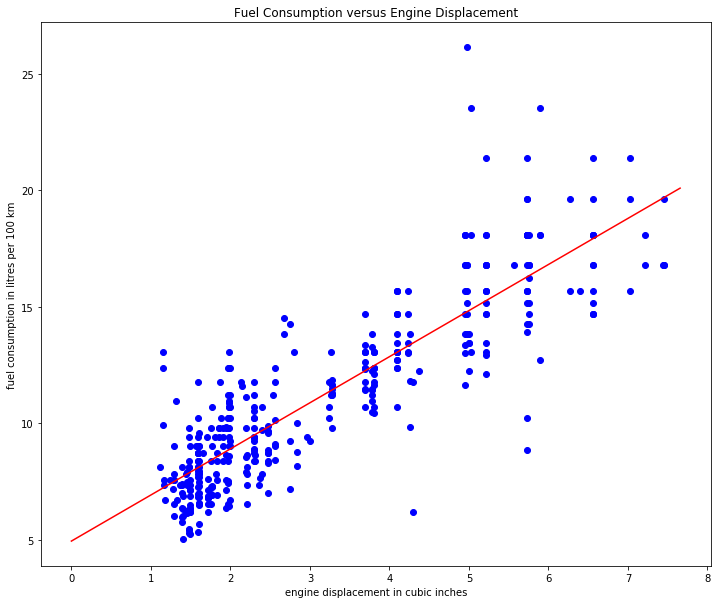

In [15]:
xMax = max(X) + 0.2
plt.figure(figsize=(12, 10))
plt.scatter(X, Y, c='b')
plt.plot([0, xMax], [ϑ0, ϑ0 + ϑ1 * xMax], c='r')
plt.xlabel('engine displacement in cubic inches')
plt.ylabel('fuel consumption in litres per 100 km')
plt.title('Fuel Consumption versus Engine Displacement')